In [1]:
import json
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# A1: Data Curation 


## Author: Jeffrey Lai

### Step 1: Gathering the English Wikipedia data from January 2008 through July 2016 for desktop using Legacy Page counts API.

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

headers = {
    'User-Agent': 'https://github.com/jeffrey25706660',
    'From': 'jeff257@uw.edu'
}

call = requests.get(endpoint_legacy.format(**example_params_legacy), headers=headers)
response = call.json()

### Write Legacy desktop data to json file

In [3]:
with open('pagecounts_desktop-site_200801-201607.json', 'w') as json_file:
     json.dump(response, json_file)

### Step 1.1: Gathering the data for mobile from English Wikipedia from January 2008 through July 2016. Note: The first full month for which mobile data is available is October 2014.

In [4]:
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

headers = {
    'User-Agent': 'https://github.com/jeffrey25706660',
    'From': 'jeff257@uw.edu'
}

call = requests.get(endpoint_legacy.format(**example_params_legacy), headers=headers)
response = call.json()

### Write Legacy mobile data to json file

In [5]:
with open('pagecounts_mobile-site_201401-201607.json', 'w') as json_file:
     json.dump(response, json_file)

# The Pageviews API

### Step 1.2: Gathering the data for desktop from Pageviews API from July 2015 through last month filtered by organic (user) traffic

In [6]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }
headers = {
    'User-Agent': 'https://github.com/jeffrey25706660',
    'From': 'jeff257@uw.edu'
}
call = requests.get(endpoint_pageviews.format(**example_params_pageviews), headers=headers)
response = call.json()

### Write Pageviews desktop data to json file

In [7]:
with open('pageviews_desktop_201507-202008.json', 'w') as json_file:
     json.dump(response, json_file)

### Step 1.3 Gathering the data for mobile-web from Pageviews API from July 2015 through last month filtered by organic (user) traffic

In [8]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }
headers = {
    'User-Agent': 'https://github.com/jeffrey25706660',
    'From': 'jeff257@uw.edu'
}
call = requests.get(endpoint_pageviews.format(**example_params_pageviews), headers=headers)
response = call.json()

### Write Pageviews mobile-web data to json file

In [9]:
with open('pageviews_mobile-web_201507-202008.json', 'w') as json_file:
     json.dump(response, json_file)

### Step 1.4 Gathering the data for mobile app from Pageviews API from July 2015 through last month filtered by organic (user) traffic

In [10]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }
headers = {
    'User-Agent': 'https://github.com/jeffrey25706660',
    'From': 'jeff257@uw.edu'
}
call = requests.get(endpoint_pageviews.format(**example_params_pageviews), headers=headers)
response = call.json()

### Write Pageviews mobile-app data to json file

In [11]:
with open('pageviews_mobile-app_201507-202008.json', 'w') as json_file:
     json.dump(response, json_file)

# Step 2: Processing the data

### Read mobile-app and mobile web data from json files.

In [12]:
with open('C:\\Users\\jeffr\\Data 512\\pageviews_mobile-app_201507-202008.json') as f:
     pageviews_mobile_app_json = json.load(f)

with open('C:\\Users\\jeffr\\Data 512\\pageviews_mobile-web_201507-202008.json') as f:
     pageviews_mobile_web_json = json.load(f)
     
pageviews_mobile_app_df = pd.DataFrame.from_dict(pageviews_mobile_app_json['items'])
pageviews_mobile_web_df = pd.DataFrame.from_dict(pageviews_mobile_web_json['items'])

### Combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month

#### Change alias name

In [13]:
pageviews_mobile_app_df['access'] = 'mobile'
pageviews_mobile_web_df['access'] = 'mobile'

#### Append data from pageviews mobile app data and pageviews mobile web data.

In [14]:
mobile_df = pageviews_mobile_web_df.append(pageviews_mobile_app_df)

#### Calculate a total mobile traffic count for each month.

In [15]:
mobile_df_agg = mobile_df.groupby(['timestamp', 'access']).agg({"views":"sum"})

In [16]:
mobile_df_agg = mobile_df_agg.reset_index()

#### Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM)

In [17]:

mobile_df_agg['year'] = mobile_df_agg['timestamp'].str[:4]
mobile_df_agg['month'] = mobile_df_agg['timestamp'].str[4:6]


#### Drop unnessessary columns, keep views by month, year, and months

In [18]:
mobile_df_agg_drop = mobile_df_agg.drop(columns=['timestamp','access'])

#### Rename columns

In [19]:
mobile_df_agg_f = mobile_df_agg_drop.rename(columns= {'views':'pageview_mobile_views'})

#### Read Page View desktop data

In [20]:
with open('C:\\Users\\jeffr\\Data 512\\pageviews_desktop_201507-202008.json') as f:
     pageviews_desktop_json = json.load(f)

pageviews_desktop_df = pd.DataFrame.from_dict(pageviews_desktop_json['items'])

#### Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM)

In [21]:

pageviews_desktop_df['year'] = pageviews_desktop_df['timestamp'].str[:4]
pageviews_desktop_df['month'] =pageviews_desktop_df['timestamp'].str[4:6]

#### Drop unnessessary columns, keep views by month, year, and months

In [22]:
pageviews_desktop_drop = pageviews_desktop_df.drop(columns=['timestamp','access','agent','granularity','project'])

#### Rename columns

In [23]:
pageviews_desktop_f = pageviews_desktop_drop.rename(columns= {'views':'pageview_desktop_views'})

#### Combine Page View desktop data with Page with mobile data

In [24]:
result = pd.merge(mobile_df_agg_f,pageviews_desktop_f,how='inner', on=['year', 'month'])

#### Calculate pageview_all_views column

In [25]:
result['pageview_all_views'] = result['pageview_mobile_views'] + result['pageview_desktop_views']

####  Read Page Count mobile data

In [26]:
with open('C:\\Users\\jeffr\\Data 512\\pagecounts_mobile-site_201401-201607.json') as f:
     pagecount_mobile_json = json.load(f)

pagecount_mobile_json_df = pd.DataFrame.from_dict(pagecount_mobile_json['items'])

#### Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM)

In [27]:
pagecount_mobile_json_df['year'] = pagecount_mobile_json_df['timestamp'].str[:4]
pagecount_mobile_json_df['month'] = pagecount_mobile_json_df['timestamp'].str[4:6]

#### Drop unnessessary columns, keep views by month, year, and months

In [28]:
pagecount_mobile_json_df_drop = pagecount_mobile_json_df.drop(columns=['timestamp','access-site','granularity','project'])

#### Rename column

In [29]:
pagecount_mobile_json_df_f = pagecount_mobile_json_df_drop.rename(columns= {'count':'pagecount_mobile_views'})

#### Combine data with the result data frame using full outer join to make sure data sets are all included

In [30]:
result = pd.merge(result,pagecount_mobile_json_df_f,how='outer', on=['year', 'month'])

####  Read Page Count desktop data

In [31]:
with open('C:\\Users\\jeffr\\Data 512\\pagecounts_desktop-site_200801-201607.json') as f:
     pagecount_desktop_json = json.load(f)

pagecount_desktop_json_df = pd.DataFrame.from_dict(pagecount_desktop_json['items'])

#### Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM)


In [32]:
pagecount_desktop_json_df['year'] = pagecount_desktop_json_df['timestamp'].str[:4]
pagecount_desktop_json_df['month'] = pagecount_desktop_json_df['timestamp'].str[4:6]

#### Drop unnessessary columns

In [33]:
pagecount_desktop_json_df_drop = pagecount_desktop_json_df.drop(columns=['timestamp','access-site','granularity','project'])

#### Rename column

In [34]:
pagecount_desktop_json_df_f = pagecount_desktop_json_df_drop.rename(columns= {'count':'pagecount_desktop_views'})

#### Combine data with the result data frame using full outer join to make sure data sets are all included

In [35]:
result = pd.merge(result,pagecount_desktop_json_df_f,how='outer', on=['year', 'month'])

#### Calculate pagecount_all_views column

In [36]:
result['pagecount_all_views'] = result['pagecount_mobile_views'].fillna(0) + result['pagecount_desktop_views']

#### Export to CSV with file name "en-wikipedia_traffic_200712-202008.csv"

In [37]:
result.to_csv("C:\\Users\\jeffr\\Data 512\\en-wikipedia_traffic_200712-202008.csv",index=False)

# Step 3: Analyze the data

### Read data from en-wikipedia_traffic_200712-202008.csv

In [38]:
data = pd.read_csv('C:\\Users\\jeffr\\Data 512\\en-wikipedia_traffic_200712-202008.csv')

### Add date time to data frame

In [39]:
data['yr-month'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))

### Sort data frame by date in order to present time series in the right order.

In [40]:
data_sort = data.sort_values(by='yr-month')

### Plot mobile traffic, desktop traffic, and all traffic with correct scale to visualize data and legends to label the data.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


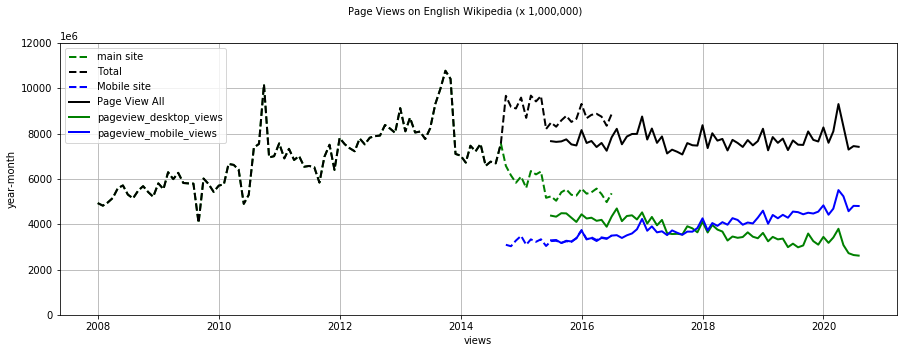

In [41]:

plt.figure(figsize=(15,5)).suptitle('Page Views on English Wikipedia (x 1,000,000)', fontsize=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6)) #Use (m,m)  to fix the order of magnitude to 10m
plt.ylim(0, 12000*1000000)
plt.plot( 'yr-month', 'pagecount_desktop_views', data=data_sort, marker='', color='green',linestyle='dashed', linewidth=2, label='main site')
plt.plot( 'yr-month', 'pagecount_all_views', data=data_sort, marker='', color='black', linewidth=2, linestyle='dashed', label='Total')
plt.plot( 'yr-month', 'pagecount_mobile_views', data=data_sort, marker='', color='blue', linewidth=2, linestyle='dashed', label='Mobile site')
plt.plot( 'yr-month', 'pageview_all_views', data=data_sort, marker='', color='black', linewidth=2, label='Page View All')
plt.plot( 'yr-month', 'pageview_desktop_views', data=data_sort, marker='', color='green', linewidth=2, label='pageview_desktop_views')
plt.plot( 'yr-month', 'pageview_mobile_views', data=data_sort, marker='', color='blue', linewidth=2, label='pageview_mobile_views')
plt.legend()
plt.xlabel('views', fontsize=10)
plt.ylabel('year-month', fontsize=10)
plt.grid()
plt.savefig('test.jpg')
